In [1322]:
############################### PART-A #######################################

In [1323]:
##########################1. Data Understanding & Exploration#################

In [1324]:
#Q1.A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [1325]:
import pandas as pd
car_name =pd.read_csv("Car name.csv")

In [1326]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [1327]:
car_name

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [1328]:
car_name.shape

(398, 1)

In [1329]:
#Q1.B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [1330]:
import json
car_attr=df = pd.read_json('Car-Attributes.json')

In [1331]:
car_attr

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [1332]:
car_attr.shape

(398, 8)

In [1333]:
#Q1.C. Merge both the DataFrames together to form a single DataFrame

In [1334]:
car_df=pd.concat([car_name,car_attr],axis=1)

In [1335]:
car_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [1336]:
#Q1.D. Print 5 point summary of the numerical features and share insights

In [1337]:
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [1338]:
# mpg,acc,yr follow normal distribution as the mean is and median (50% percentile) are alomost same
# cyl,disp,wt,origin seems to have skewed data which needed to be analysed further
# 25% of data have mpg less than 17.5, 4 cylinders or lower, weight of 2224 of lower,acceleration of 13.83 or lower,model year of 73 or before
# 75% of data have mpg less than 29,8 cylinders or lower, 3608 of less in weight,17.18 or less in acceleration & model year of 79 or before
# Features needs to be scaled/normaised to model and test PCA as columns have different value ranges

In [1339]:
##########################2. Data Preparation & Analysis#################

In [1340]:
#Q2.A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [1341]:
car_df.isnull().mean()*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [1342]:
#No missing values found in the dataset

In [1343]:
#Q2.B. Check for duplicate values in the data and impute with the best suitable approach

In [1344]:
boolean = car_df.duplicated().any()

In [1345]:
boolean

False

In [1346]:
#No duplicates found in the whole dataset. However, using drop_dulicates() to remove as optional step

In [1347]:
car_dfnew=car_df.drop_duplicates()

In [1348]:
car_dfnew

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [1349]:
#Q2.C. Plot a pairplot for all features

In [1350]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

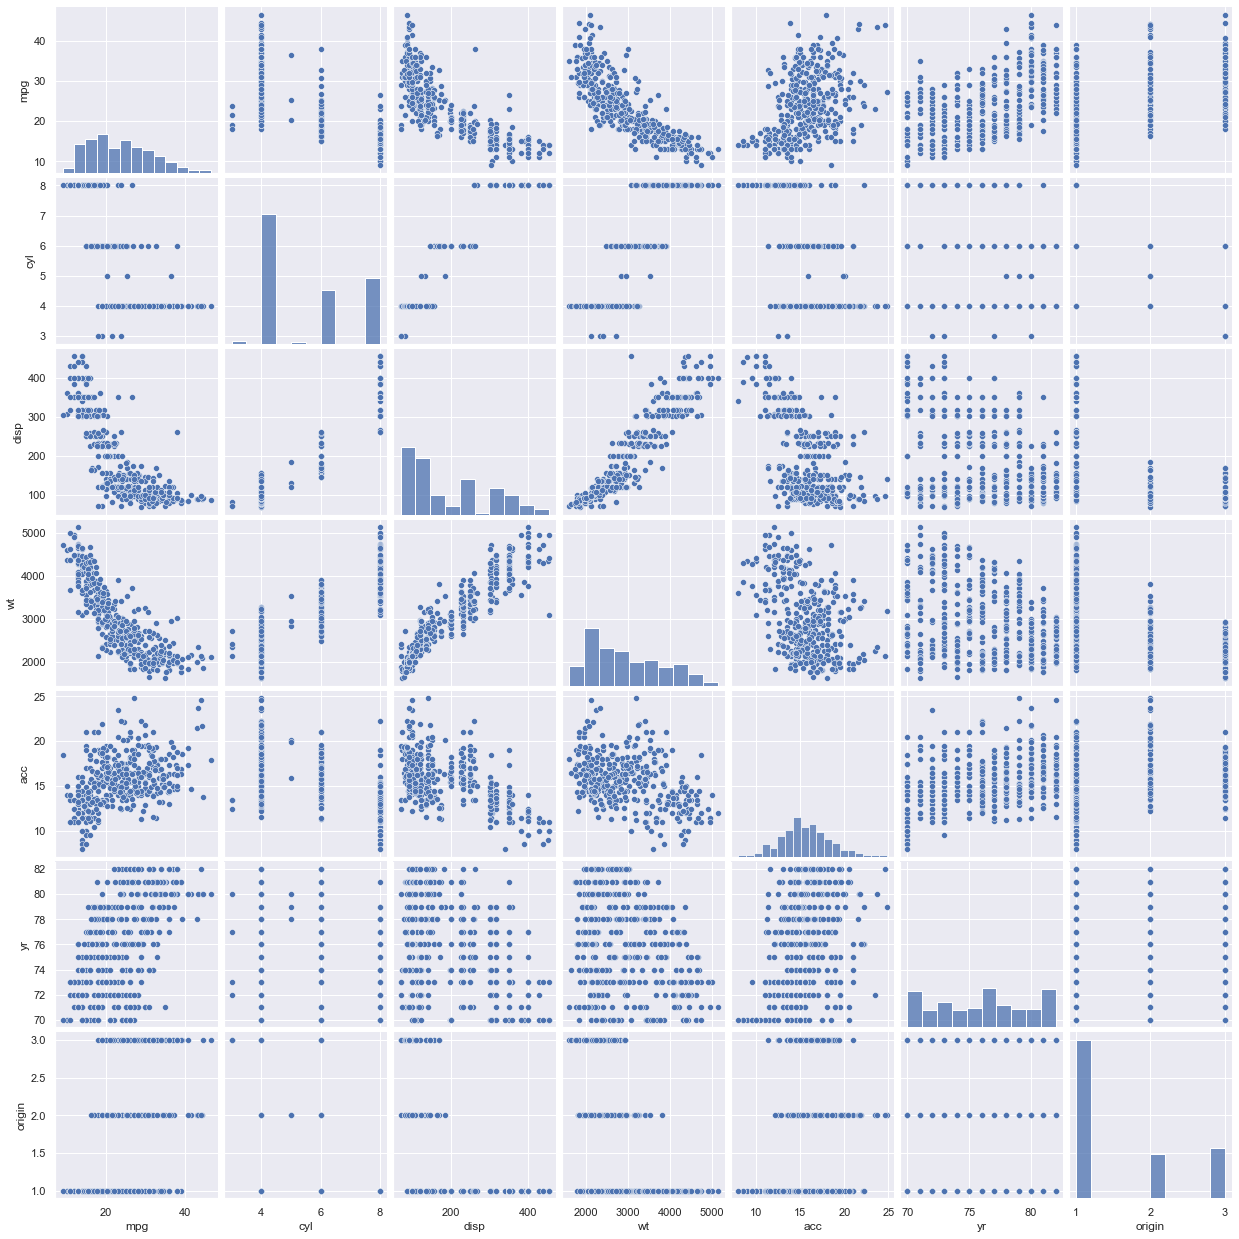

In [1351]:
sns.pairplot(car_dfnew)

In [1352]:
#Q2.D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

In [1353]:
car_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 47.3+ KB


<AxesSubplot:xlabel='wt', ylabel='disp'>

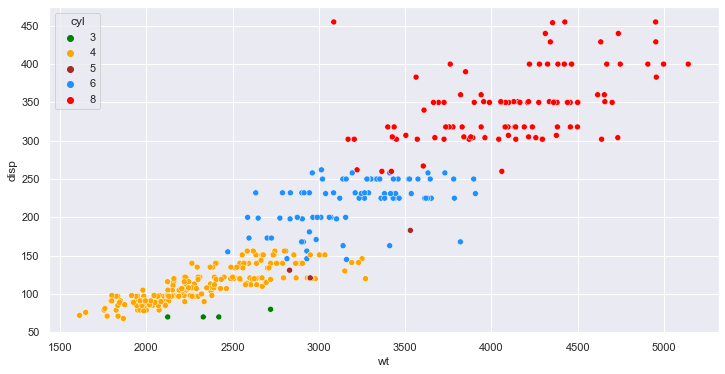

In [1354]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x='wt',y='disp',hue='cyl',legend='full',data=car_dfnew,palette=['green','orange','brown','dodgerblue','red'])

In [1355]:
#Q2.E. Share insights for Q2.D

In [1356]:
# Displaement increased with weight and number of cylinders - positvie corelation
# Displacement is 150-155 or lower for 3 or 4 cylinder engines
# Displacement is 250-155 or lower for 6 cylinder engines or lower
# Displacement range between 250 to 450 (outliers not considered) for 6 cylinder engines
# Weight of the car is 3500 or lower for 3/4 cylinder engines
# Weight of the car ranges between 2600 to 3900 for 6 cylinder engines (outliers excluded)
# Weight of the car ranges between 3100 to 5250 for 8 cylidner engines

In [1357]:
#Q2.F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

<AxesSubplot:xlabel='wt', ylabel='mpg'>

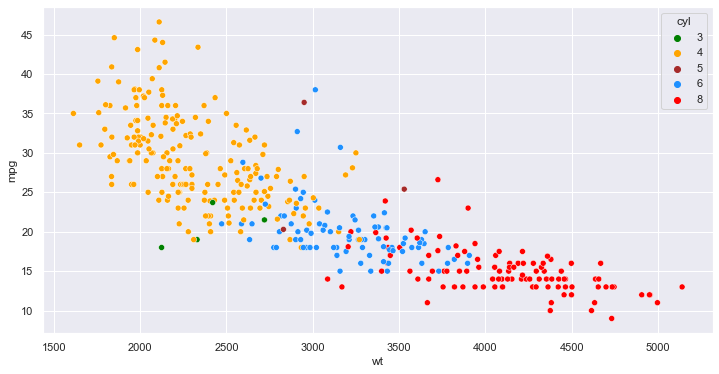

In [1358]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x='wt',y='mpg',hue='cyl',legend='full',data=car_dfnew,palette=['green','orange','brown','dodgerblue','red'])

In [1359]:
#Q2.G. Share insights for Q2.F

In [1360]:
# mpg is negatively correlated to weight
# mpg drops as the weight of the car increases
# mpg for 4 cylinder engine or below ranges between 20 to 45
# mpg of 5 or 6 cylidner engine ranges between 15 to 25 (excluding outliers)
# mpg for 8 cylinder engine ranges between 5-20 (excluding outlers)

In [1361]:
#Q2.H. Check for unexpected values in all the features and datapoints with such values

In [1362]:
car_dfnew.shape

(398, 9)

In [1363]:
car_dfnew.isnull().value_counts()

car_name  mpg    cyl    disp   hp     wt     acc    yr     origin
False     False  False  False  False  False  False  False  False     398
dtype: int64

In [1364]:
car_dfnew['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: hp, Length: 94, dtype: int64

In [1365]:
car_dfnew.dtypes=='object'

car_name     True
mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
dtype: bool

In [1366]:
# HP is numerical column which is considered as object. This needs to be checked for any missing values

In [1367]:
car_dfnew['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: hp, Length: 94, dtype: int64

In [1368]:
car_dfnew['hp'].dtypes

dtype('O')

In [1369]:
car_dfnew['hp'].value_counts() == '?'

150    False
90     False
88     False
110    False
100    False
       ...  
61     False
93     False
148    False
152    False
82     False
Name: hp, Length: 94, dtype: bool

In [1370]:
def missing_check(car_dfnew):
    total = car_dfnew.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (car_dfnew.isnull().sum()/car_dfnew.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(car_dfnew)

,Total,Percent
car_name,0,0.0
mpg,0,0.0
cyl,0,0.0
disp,0,0.0
hp,0,0.0
wt,0,0.0
acc,0,0.0
yr,0,0.0
origin,0,0.0


In [1371]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_dfnew.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_dfnew[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [1372]:
# As special characters are identified in hp column, the same is to be reaplced with nan and later convert to numerical column

In [1373]:
import numpy as np
# Missing values have a'?''
# Replace missing values with NaN
car_data = car_dfnew.replace('?', np.nan)
car_data[hpIsDigit['hp'] == False]
car_data.shape

(398, 9)

In [1374]:
#Dropping na from hp column in dataset
cd_df=car_data.dropna()
cd_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [1375]:
#Total identified nan values is 6. These rows have been droped in considering it is less than 5% of the total data

In [1376]:
########################## 3. Clustering ##########################

In [1377]:
#Q3.A. Apply K-Means clustering for 2 to 10 clusters

In [1378]:
cd_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [1379]:
#Applying zscore to eliminate units and scaling all columns to comparable numbers
from scipy.stats import zscore
car_data_temp=cd_df.iloc[:,1:]
car_df_scaled=car_data_temp.apply(zscore)
car_df_scaled.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.840931e-16,-1.699321e-16,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16,-9.754102e-16,2.883181e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-7.166410e-01
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-7.166410e-01
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,-7.166410e-01
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,5.263824e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,1.769406e+00


In [1380]:
car_df_scaled.dtypes

mpg       float64
cyl       float64
disp      float64
hp        float64
wt        float64
acc       float64
yr        float64
origin    float64
dtype: object

In [1381]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [1382]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
# Applying 2 to 10 clusters
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    km_model=KMeans(n_clusters=k)
    km_model.fit(car_df_scaled)
    prediction=km_model.predict(car_df_scaled)
    meanDistortions.append(sum(np.min(cdist(car_df_scaled, km_model.cluster_centers_, 'euclidean'), axis=1)) / car_df_scaled.shape[0])

In [1383]:
#Q3.B. Plot a visual and find elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

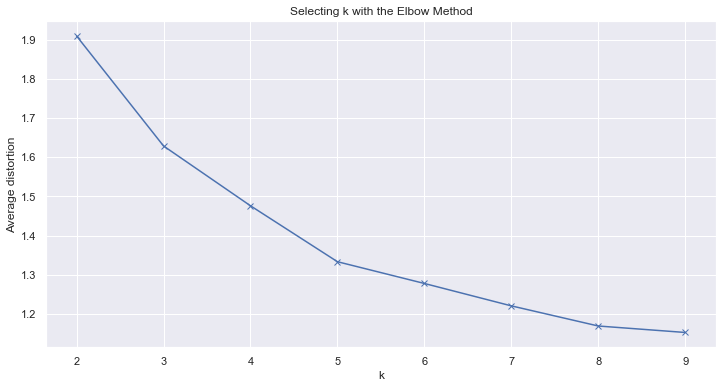

In [1384]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [1385]:
#Q3.C. On the above visual, highlight which are the possible Elbow points.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

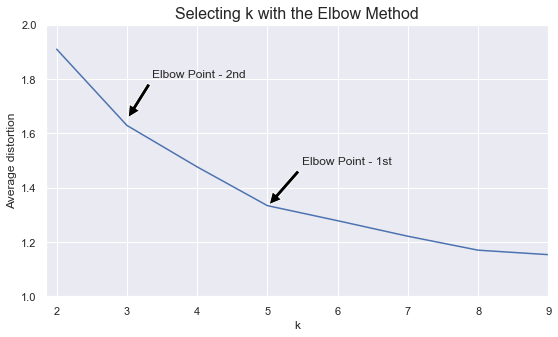

In [1389]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(9, 5))
line, = ax.plot(clusters, meanDistortions)

ax.annotate('Elbow Point - 1st',
            xy=(5, 1.33), xycoords='data',
            xytext=(35, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')
ax.annotate('Elbow Point - 2nd',
            xy=(3, 1.65), xycoords='data',
            xytext=(25, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')
ax.set(xlim=(1.85, 9), ylim=(1, 2))
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method',fontsize=16)

In [1390]:
#Q3.D. Train a K-means clustering model once again on the optimal number of clusters

In [1391]:
# Let us first start with first possibility, K = 5
cd_model1=KMeans(5)
cd_model1.fit(car_df_scaled)
prediction1=cd_model1.predict(car_df_scaled)

In [1392]:
# Let us first start with second possibility, K = 3
cd_model2=KMeans(3)
cd_model2.fit(car_df_scaled)
prediction2=cd_model2.predict(car_df_scaled)

In [1393]:
#Q3.E. Add a new feature in the DataFrame which will have labels based upon cluster value

In [1394]:
#Append the prediction in car dataset where KMeans model is done for k=5
cd1=cd_df.copy()
cd1.loc[:,("GROUP1")] = prediction1
car_df_scaled.loc[:,("GROUP1")] = prediction1
print("Groups Assigned : \n")
cd1.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP1
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [1395]:
#Append the prediction in cd dataset where KMeans model is done for k=3
cd2=cd_df.copy()
car_df_scaled_cp=car_df_scaled.copy()
cd2.loc[:,("GROUP2")] = prediction2
car_df_scaled_cp.loc[:,("GROUP2")] = prediction2
print("Groups Assigned : \n")
cd2.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP2
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [1396]:
cd1_cp=cd1.copy()
cdCluster = cd1_cp.groupby(['GROUP1'])
cdCluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP1,,,,,,,,
0,24.614458,4.048193,108.728916,85.578313,2351.253012,16.072289,73.337349,2.120482
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,19.081250,6.225000,233.862500,101.987500,3303.875000,16.627500,75.725000,1.037500
3,34.035714,4.085714,99.728571,72.285714,2158.057143,16.740000,79.385714,2.785714
4,28.960000,4.200000,132.169231,82.538462,2551.307692,16.523077,79.630769,1.076923


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP1]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP1]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

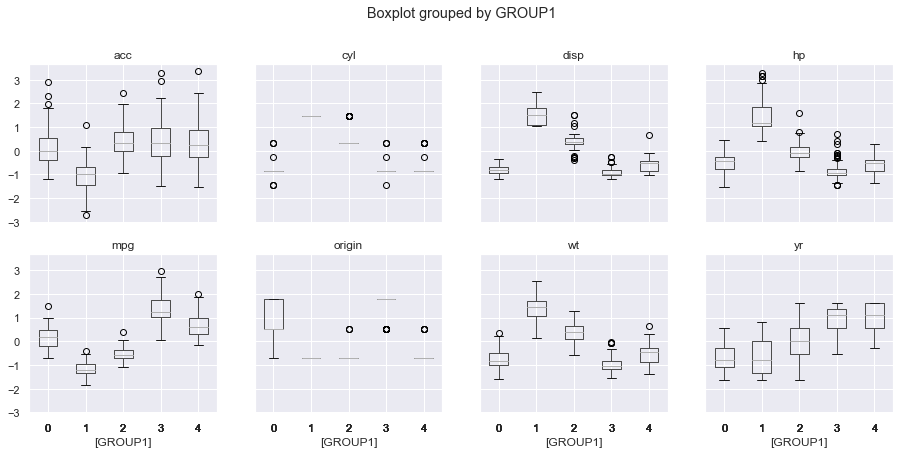

In [1397]:
car_df_scaled.boxplot(by='GROUP1',layout=(3,4),figsize=(15,10))

In [1398]:
#3.F. Plot a visual and color the datapoints based upon clusters

<AxesSubplot:title={'center':'Kmeans Scatterplot of weight & HP'}, xlabel='\n Weight', ylabel='HP'>

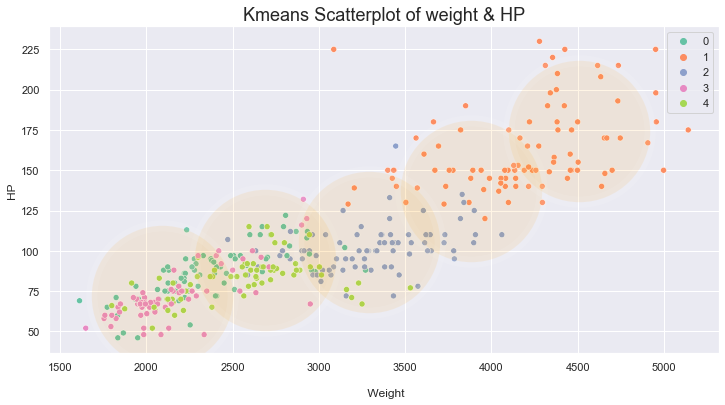

In [1399]:
import seaborn as sns
x_y = np.column_stack((cd_df['wt'], cd_df['hp']))
km_res = KMeans(n_clusters=5).fit(x_y)
clusters = km_res.cluster_centers_
plt.xlabel("\n Weight",fontsize=12)
plt.ylabel("HP",fontsize=12)
plt.title("Kmeans Scatterplot of weight & HP", fontsize=18)
sns.scatterplot(cd_df['wt'], cd_df['hp'], hue=prediction1,palette="Set2")
sns.scatterplot(clusters[:,0], clusters[:,1], s=20000, color='orange',alpha=0.1)

<AxesSubplot:title={'center':'Kmeans Scatterplot of weight & HP'}, xlabel='\n Weight', ylabel='HP'>

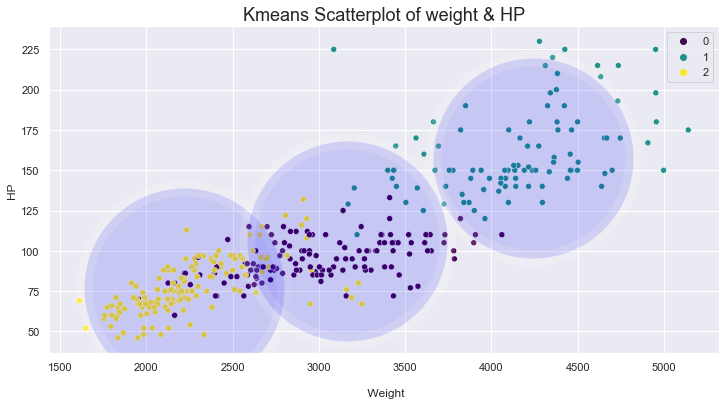

In [1400]:
import seaborn as sns
x_y = np.column_stack((cd_df['wt'], cd_df['hp']))
km_res = KMeans(n_clusters=3).fit(x_y)
clusters = km_res.cluster_centers_
plt.xlabel("\n Weight",fontsize=12)
plt.ylabel("HP",fontsize=12)
plt.title("Kmeans Scatterplot of weight & HP", fontsize=18)
sns.scatterplot(cd_df['wt'], cd_df['hp'], hue=prediction2,palette="viridis")
sns.scatterplot(clusters[:,0], clusters[:,1], s=40000, color='blue',alpha=0.15)

In [1401]:
#Q3.G. Pass a new DataPoint and predict which cluster it belongs to

In [1402]:
#Creating sysnthetic dataset to test the optimal model of k=5
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=1000, 
    n_features=7, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

sy_df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
sy_df.columns = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']
# 5 random rows
sy_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
852,-1.600904,-0.828497,-0.175854,-0.103255,-1.643189,-0.498766,1.615756,0
165,-0.985804,-0.284155,-1.372859,1.194763,0.894647,-0.218043,3.049574,0
793,-1.177761,1.469784,1.328166,-0.622270,-1.840266,1.983208,-0.084573,1
517,-0.627313,0.045223,-1.372466,0.051198,-0.501784,-1.797370,-0.414625,0
506,-0.668143,0.193379,1.900268,-1.348177,0.015682,0.773888,0.952807,1


In [1403]:
sy_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.020989,-0.029920,0.007432,-0.054833,-0.034170,-0.012693,1.025840,0.502000
std,1.018718,1.029047,1.019710,0.994168,0.973862,1.225378,1.071457,0.500246
min,-2.704392,-2.991136,-3.170426,-3.007632,-3.176704,-2.850971,-2.472718,0.000000
25%,-0.734410,-0.761647,-0.649675,-0.737099,-0.656860,-0.984268,0.307209,0.000000
50%,-0.054913,-0.015419,0.014006,-0.024312,-0.043297,-0.102945,1.023750,1.000000
75%,0.670958,0.640935,0.699907,0.611486,0.648718,0.973550,1.724713,1.000000
max,3.529055,3.152057,3.926238,2.935406,2.935658,3.342864,4.138715,1.000000


In [1404]:
#Scaling the data
sy_temp=sy_df.copy()
sy_scaled=sy_temp.apply(zscore)
sy_scaled.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-7.882583e-18,3.064216e-17,4.218847e-17,-4.399259e-18,-1.176836e-17,-9.103829e-18,-1.942890e-17,-4.241052e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.635415e+00,-2.879069e+00,-3.117994e+00,-2.971608e+00,-3.228491e+00,-2.317406e+00,-3.266868e+00,-1.004008e+00
25%,-7.006623e-01,-7.114282e-01,-6.447283e-01,-6.866118e-01,-6.397227e-01,-7.932749e-01,-6.710400e-01,-1.004008e+00
50%,-3.331673e-02,1.409832e-02,6.449824e-03,3.071452e-02,-9.377205e-03,-7.368885e-02,-1.951301e-03,9.960080e-01
75%,6.795730e-01,6.522449e-01,6.794301e-01,6.705631e-01,7.015669e-01,8.052507e-01,6.525908e-01,9.960080e-01
max,3.486559e+00,3.093705e+00,3.844984e+00,3.009285e+00,3.051061e+00,2.739756e+00,2.906728e+00,9.960080e-01


In [1405]:
# Fitting the model with optimal parameter for k, K = 5
sy_model=KMeans(5)
sy_model.fit(sy_scaled)
pred=cd_model1.predict(sy_scaled)

In [1406]:
#Append the prediction in synthetic dataset where KMeans model is done for k=5
sy_df_temp=sy_df.copy()
sy_df_temp.loc[:,("GROUP1")] = pred
sy_scaled_temp=sy_scaled.copy()
sy_scaled_temp.loc[:,("GROUP1")] = pred
print("Groups Assigned : \n")
sy_df_temp.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP1
0,0.500666,0.049774,0.698828,0.007063,-0.660321,0.233485,3.103090,0,4
1,-0.103587,-0.213875,0.220584,0.970316,0.418760,0.485979,1.132966,1,2
2,0.075576,1.048864,-1.045529,-0.029216,0.775115,1.274276,1.004222,1,2
3,-0.779019,0.272421,-0.818605,0.417465,1.191086,0.500518,1.848515,1,2
4,0.285803,-0.845154,-1.594756,0.553389,-0.033925,-1.345687,0.581673,0,0


<AxesSubplot:title={'center':'Kmeans Scatterplot of weight & HP'}, xlabel='\n Weight', ylabel='HP'>

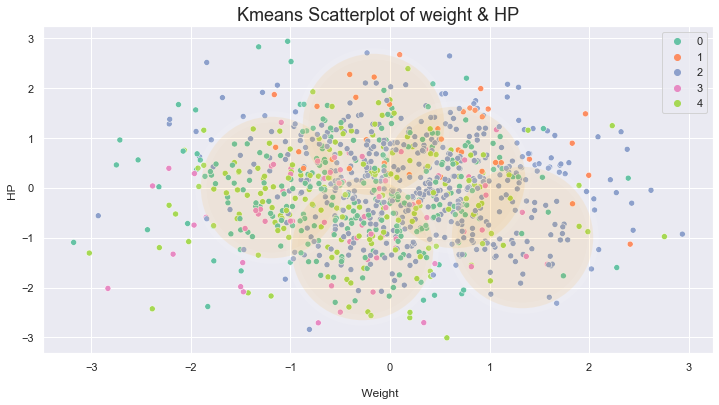

In [1409]:
import seaborn as sns
x_y = np.column_stack((sy_df['wt'], sy_df['hp']))
km_syd = KMeans(n_clusters=5).fit(x_y)
clusters = km_syd.cluster_centers_
plt.xlabel("\n Weight",fontsize=12)
plt.ylabel("HP",fontsize=12)
plt.title("Kmeans Scatterplot of weight & HP", fontsize=18)
sns.scatterplot(sy_df['wt'], sy_df['hp'], hue=pred,palette="Set2")
sns.scatterplot(clusters[:,0], clusters[:,1], s=20000, color='orange',alpha=0.1)

In [1410]:
syClusterscl = sy_scaled_temp.groupby(['GROUP1'])
syClusterscl.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP1,,,,,,,,
0,0.073689,-0.468503,-0.507183,-0.067473,-0.341220,0.568090,-0.609193,0.602431
1,-0.587296,0.713508,0.845538,1.020449,0.445938,-1.232523,-1.039480,-0.901443
2,-0.355570,0.394347,0.345399,0.080871,0.321697,-0.134191,0.001359,-0.109933
3,1.225609,-0.225483,-0.255551,-0.464010,-0.434161,0.400116,0.623218,0.996008
4,0.492108,-0.485636,-0.306055,-0.161633,-0.314103,-0.359375,0.876322,-0.823284


In [1411]:
syCluster = sy_df_temp.groupby(['GROUP1'])
syCluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP1,,,,,,,,
0,0.054042,-0.511791,-0.509488,-0.121878,-0.366305,0.683083,0.373442,0.803213
1,-0.618979,0.703946,0.869204,0.959158,0.399895,-1.522244,-0.087362,0.051282
2,-0.383034,0.375679,0.359463,0.025527,0.278962,-0.177046,1.027295,0.447034
3,1.226936,-0.261836,-0.253025,-0.515905,-0.456771,0.477355,1.693257,1.000000
4,0.480079,-0.529412,-0.304499,-0.215443,-0.339909,-0.452843,1.964312,0.090361


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP1]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP1]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP1]'>]],
      dtype=object)

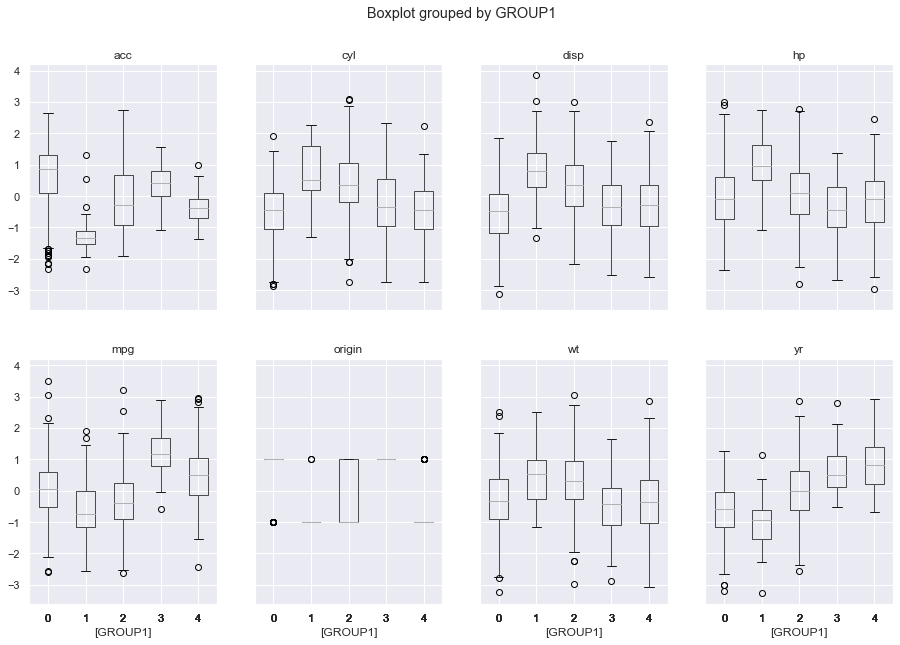

In [1412]:
sy_scaled_temp.boxplot(by='GROUP1', layout = (2,4),figsize=(15,10))

In [1413]:
######################## End of PART-A #######################################

In [1414]:
################################################################################################################################

In [1415]:
############################### PART-B #######################################

In [1416]:
##########################1. Data Understanding & Cleaning ###################

In [1417]:
#1.A. Read ‘vehicle.csv’ and save as DataFrame

In [1418]:
df_vehicle=pd.read_csv('vehicle.csv')
df_vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [1419]:
#1.B. Check percentage of missing values and impute with correct approach

In [1420]:
df_vehicle.isnull().mean()*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [1421]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [1422]:
# Missing values have a'?''
# Replace missing values with NaN
df_vehicle = df_vehicle.replace('?', np.nan)

In [1423]:
df_vehicle.isnull().mean()*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [1424]:
df_vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [1425]:
#Identify numerical columns in dataframe df_vehicle
vehicle_num_cols = df_vehicle.select_dtypes(include=np.number).columns.tolist()
vehicle_num_cols

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

In [1426]:
df_vehicle[vehicle_num_cols].median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [1427]:
vehicle_imp=df_vehicle.copy()
vehicle_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [1428]:
#from sklearn.impute import SimpleImputer
# Model Creation
#si_med = SimpleImputer(strategy ='median')
# fitting the imputer on the copied dataset vehicle_imp with median strategy on numercial columns
#si_med.fit(vehicle_imp[vehicle_num_cols])
vehicle_imp[vehicle_num_cols] = vehicle_imp[vehicle_num_cols].fillna(vehicle_imp[vehicle_num_cols].median())
vehicle_imp.isnull().median()

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

In [1429]:
#1.C. Visualize a Pie-chart and print percentage of values for variable ‘class’

In [1430]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1431]:
vehicle_imp['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

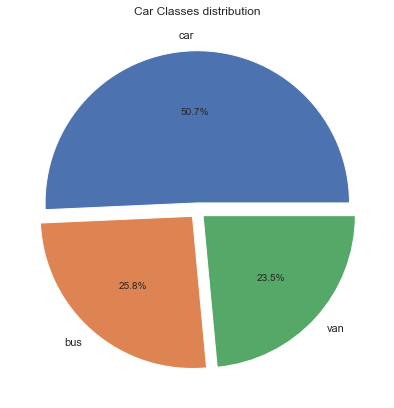

In [1432]:
#fig1, ax1 = plt.subplots()
labels=['car','bus','van']
explode = [0.05, 0.05, 0.05]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(vehicle_imp['class'].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
plt.title("Car Classes distribution")
plt.show()

In [1433]:
#1.D. Check for duplicate rows in the data and impute with correct approach

In [1434]:
vehicle_imp.duplicated().value_counts()

False    846
dtype: int64

In [1435]:
#No Duplicate values found

In [1436]:
##########################2. Data Preparation#############################

In [1437]:
#2.A. Split data into X and Y. [Train and Test optional]

In [1438]:
# independant variables
x = vehicle_imp.drop(['class'], axis=1)
# the dependent variable
y = vehicle_imp[['class']]

In [1439]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [1440]:
#2.B. Standardize the Data

In [1441]:
from scipy.stats import zscore
xScaled=x.apply(zscore)
xScaled.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
841,-0.082445,-0.949961,0.311432,0.423146,0.294851,-0.123383,0.003385,-0.119910,-0.224342,-0.964965,0.363829,-0.098159,-0.790323,-0.059384,0.130256,1.389197,-0.149374,-0.085062
842,-0.568495,0.191843,0.120741,-0.175986,0.548738,0.529004,-0.298019,0.264347,-0.224342,0.758332,-0.497638,-0.404295,0.039756,-0.059384,-1.094148,0.829015,-0.474650,0.183957
843,1.497218,1.496763,1.201323,1.591454,0.675681,0.746467,1.600825,-1.400769,1.708378,1.723379,1.257202,1.596929,0.777604,-0.327326,-0.686013,-0.963565,-0.312012,0.721997
844,-0.933032,-1.439306,-0.260641,-0.685249,-0.466810,-0.340845,-1.021388,1.160948,-0.997430,-1.654284,-1.071950,-0.959876,-0.821066,-0.863208,-1.298215,1.389197,0.175903,-0.085062
845,-1.054545,-1.439306,-1.023405,-1.374251,-0.847640,-0.775770,-1.473494,1.929463,-1.383974,-1.378557,-1.550542,-1.288689,-1.343709,0.074587,-1.094148,0.604943,-0.474650,-0.757612


In [1442]:
xScaled.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02
mean,5.572112e-16,-1.018361e-16,2.370051e-16,8.871286e-17,3.732239e-16,-2.036721e-16,-4.391024e-16,-8.582575e-17,-4.320159e-16,7.968409e-16,-8.845039e-17,-1.057730e-16,1.742761e-16,-1.785904e-16,-2.782119e-17,-3.910715e-17,-1.370850e-15,1.544470e-15
std,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00
min,-2.512695e+00,-1.928651e+00,-2.676060e+00,-1.943427e+00,-1.863187e+00,-1.428157e+00,-1.714617e+00,-1.913112e+00,-1.383974e+00,-2.067876e+00,-1.869604e+00,-1.447426e+00,-2.020069e+00,-1.801003e+00,-1.298215e+00,-1.411710e+00,-2.101034e+00,-1.968200e+00
25%,-8.115196e-01,-7.868465e-01,-7.691502e-01,-8.350318e-01,-5.937529e-01,-3.408453e-01,-6.597038e-01,-1.016511e+00,-6.108857e-01,-7.581695e-01,-6.890755e-01,-6.863374e-01,-7.903227e-01,-7.292377e-01,-8.900807e-01,-8.515285e-01,-7.999271e-01,-7.239842e-01
50%,-8.244465e-02,-1.343867e-01,-1.335137e-01,-5.615980e-02,-8.597938e-02,-1.233829e-01,-3.583000e-01,2.643474e-01,-2.243417e-01,-1.377823e-01,-3.062013e-01,-4.298065e-01,-3.710316e-02,-1.263695e-01,-7.381157e-02,-1.793110e-01,-1.493736e-01,1.839573e-01
75%,7.681428e-01,6.811881e-01,1.010632e+00,7.826254e-01,4.217941e-01,3.115419e-01,8.774555e-01,6.486049e-01,9.352903e-01,7.583325e-01,9.062337e-01,8.358405e-01,7.161164e-01,3.425279e-01,5.383902e-01,7.169791e-01,6.638184e-01,7.219967e-01
max,3.076880e+00,2.312338e+00,1.900523e+00,4.916638e+00,9.688661e+00,1.009735e+01,2.896861e+00,2.569893e+00,3.254554e+00,2.757358e+00,4.192571e+00,3.280679e+00,2.868172e+00,8.380770e+00,3.191265e+00,3.181777e+00,2.778117e+00,2.067095e+00


In [1443]:
# converting type of columns to 'category'
vehicle_imp[['class']] = vehicle_imp[['class']].astype('category')
y=vehicle_imp[['class']]
y.dtypes

class    category
dtype: object

In [1447]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
y_trans = le.fit_transform(y.values.ravel())
yCat=pd.DataFrame(y_trans, columns=['class_Encoded'])
yCat.head()

,class_Encoded
0,2
1,2
2,1
3,2
4,0


In [1448]:
########################## 3. Model Building ##########################

In [1449]:
#3.A. Train a base Classification model using SVM

In [1450]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xScaled, yCat, test_size=0.2, random_state=0)# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(x_train,y_train.values.ravel()) 

SVC(kernel='linear')

In [1451]:
#3.B. Print Classification metrics for train data

In [1452]:
from sklearn.metrics import classification_report
y_pred=clf.predict(x_test)
print("\nClassification Matrix for the SVM Train Data: \n\n",classification_report(y_test, y_pred,target_names=['bus','car','van']))


Classification Matrix for the SVM Train Data: 

               precision    recall  f1-score   support

         bus       0.92      0.90      0.91        40
         car       0.96      0.94      0.95        95
         van       0.92      1.00      0.96        35

    accuracy                           0.94       170
   macro avg       0.93      0.95      0.94       170
weighted avg       0.94      0.94      0.94       170



In [1453]:
#From the above Classifciation Report, it is observed that F1 score is above 90% for all the vehicle types which is good.
# Accuracy is 94%.Let us see later how this changes with changing the features with Principle components

In [1454]:
#3.C. Apply PCA on the data with 10 components

In [1455]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(xScaled)

PCA(n_components=10)

In [1456]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [1457]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [1458]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


In [1459]:
#3.D. Visualize Cumulative Variance Explained with Number of Components

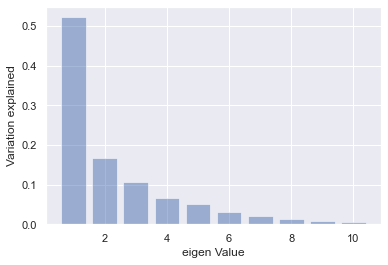

In [1460]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

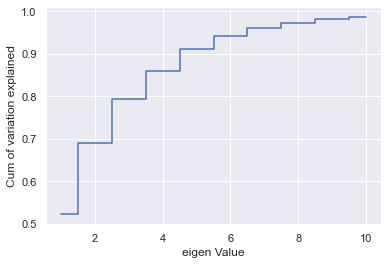

In [1461]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [1462]:
#3.E. Draw a horizontal line on the above plot to highlight the threshold of 90%

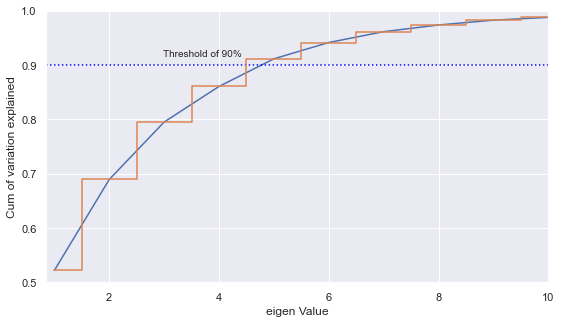

In [1463]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(9, 5))
line, = ax.plot(list(range(1,11)), np.cumsum(pca.explained_variance_ratio_))

ax.annotate('Threshold of 90%',
            xy=(3.25, 0.92), xycoords='data',
            xytext=(25, 5), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top')
plt.axhline(0.9, color='blue', ls='dotted')
ax.set(xlim=(0.85,10), ylim=(0.5, 1))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [1464]:
#3.F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [1465]:
pca5 = PCA(n_components=5)
pca5.fit(xScaled)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(xScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205468e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484385e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [1466]:
Xpca5

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007084e-02],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423636e+00],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680052e-02],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510370e-02]])

In [1478]:
#3.G. Train SVM model on components selected from above step

In [1479]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xScaled, yCat.values.ravel(), test_size=0.2, random_state=0)# import support vector classifier 
# "Support Vector Classifier"

pca = PCA(n_components=5)
pca.fit(x_train)
x_train5 = pca.transform(x_train)
x_test5 = pca.transform(x_test)
clf5 = SVC()
clf5.fit(x_train5, y_train)
print('score', clf5.score(x_test5, y_test))
print('pred label', clf5.predict(x_test5))

score 0.8
pred label [1 1 1 1 1 1 2 1 2 2 1 1 0 0 2 1 1 2 2 1 2 2 2 1 0 0 1 1 2 1 2 1 0 1 2 0 0
 1 2 1 0 2 1 0 0 0 1 1 1 1 2 2 2 1 2 2 1 2 1 1 0 0 1 1 1 0 1 1 2 0 2 1 1 1
 0 0 1 2 1 2 1 1 1 1 1 2 1 2 0 1 0 1 1 2 1 1 1 1 1 1 0 0 0 1 2 1 0 1 0 0 1
 0 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 2 2 1 1 1 2 2 0 0 1 2 1 0 1 1 1 0 1 1 2 1
 0 1 0 1 1 1 1 2 1 1 1 2 1 1 1 2 1 0 1 0 1 0]


In [1480]:
#3.H. Print Classification metrics for train data of above model and share insights

In [1481]:
from sklearn.metrics import classification_report
y_pred5=clf5.predict(x_test5)
print("\nClassification Matrix for the SVM Train Data: \n\n",classification_report(y_test, y_pred5,target_names=['bus','car','van']))


Classification Matrix for the SVM Train Data: 

               precision    recall  f1-score   support

         bus       0.78      0.70      0.74        40
         car       0.88      0.88      0.88        95
         van       0.63      0.69      0.66        35

    accuracy                           0.80       170
   macro avg       0.76      0.76      0.76       170
weighted avg       0.80      0.80      0.80       170



In [1482]:
# From the above classifciation Report, it is noted that the F1 score has dropped to 76% on macro average (ranges 66% to 88%)
# Before applying PCA, the model gave a F1 score of 90% and above
# Similar observation in accuracy score as well. It dropped to 80% from earlier model of 94%

In [1483]:
########################## 4. Performance Imporovement ##########################

In [1484]:
#4.A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [1486]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf5, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train5, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.493 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1487]:
#4.B. Share best Parameters observed from above step

In [1488]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [1489]:
#4.C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

In [1490]:
grid_predictions = grid.predict(x_test5)
  
# print classification report
print("\nClassification Matrix for the SVM Train Data - after tuning: \n\n",classification_report(y_test, grid_predictions,target_names=['bus','car','van']))


Classification Matrix for the SVM Train Data - after tuning: 

               precision    recall  f1-score   support

         bus       0.78      0.80      0.79        40
         car       0.89      0.89      0.89        95
         van       0.70      0.66      0.68        35

    accuracy                           0.82       170
   macro avg       0.79      0.78      0.79       170
weighted avg       0.82      0.82      0.82       170



In [1491]:
#From the Calssificaiton Report above, the following observations are reviewed:

In [1492]:
# There has been marginal imporvement in F1 score and accuracy after tuning hyperparameters in the model:
    # F1 score imporved from average 76% to 79% 
        # F1 score means - how much % of positive predictions were correct [2*P*R/(P+R) where P is precision & R is recall]
    # Accuracy improved from 80% to 82%
        # Accuracy is % of data correctly classified [% of (True positive + True Negative)/Total data]

#F1 score is used as single metric to consider rather reviewing precision and recall independently
    # Precision improved from 76% to 79%
        # Precision is % of correct preictions on the total predictions (TP/(TP+FP), where TP is true positive & FP is false positive)
    # Recall imporved from 76% to 79%    
        # Recall is % of positivied that were correctly identified (TP/(TP+FN), wher TP is true positive & FN is false negative)

In [1493]:
########################## 5. Data Understanding & Cleaning ##########################

In [1494]:
#5.A. Explain pre-requisite/assumptions of PCA

In [1495]:
# There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset
# PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise
#. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components
# PCA is one of the dimension reduciton technique which helps in reducing number of features to simplify calculation and provide prediction results as close to orinigal feature

In [1496]:
#5.B. Explain advantages and limitations of PCA

In [1497]:
# Advantages of PCA-
    # Removes the correlated attributes
        #This is the main characteristic of the PCA: it helps us to reduce a very large data set. 
        #This can be very useful if we need to run an algorithm through our data and/or visualize it. 
        # Otherwise, it would be very difficult to easily visualize all of our features.
    # Help to reduce overfitting.
        #Using PCA to lower the dimensions of the data set can prevent overfit
    # Improves the data visualization
        #Trying to understand and visualize a high-dimensional data set can be difficult. 
        #PCA helps us to transform our data in high dimensions to a low dimensional data set, so we can visualize it a lot better.
    # It also help to improve the performance of Algorithm
        #When we use the principal components of the data set instead of all the variables and want to implement machine learning algorithms, this will help them to converge faster. 
        #With fewer features, the training time of the algorithms will decrease.

# Disadvantages of PCA-
    # Data normalization must be needed before applyingPCA
        #The PCA algorithm identifies those directions in which the variance in the data is bigger
        #Variables from Unscaled data (normalised/standardised) would dominate the PCA
    # Some level of information loss
        #As PCA is a dimmension reduction technique, we might loss right information if right priocipal components are not selected
    # Independent variables are becoming less interpretable
        # Original features transforms to principal components in PCA. hence, it is difficult to understand which feature has more significance